In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Training Dataset precessing:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
 for x in ['Alley','MiscFeature','Fence','PoolQC','FireplaceQu']:
        df=df.drop(x,axis=1)


In [28]:
mean=df['LotFrontage'].mean()
df['LotFrontage']=df['LotFrontage'].fillna(mean)
df=df.dropna()


In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [30]:
for x in (df.columns[df.dtypes=='object']):
    df[x]= label_encoder.fit_transform(df[x])


In [31]:
X= df.drop(['Id','SalePrice'],axis=1)
Y= df['SalePrice']

# Data correlation:

In [32]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.016725,-0.007394,-0.013304,-0.036083,0.006018,0.033823,-0.015138,0.013866,0.062311,...,0.005106,-0.043766,0.000904,0.059455,-0.002206,0.020939,0.002241,0.014868,-0.000839,-0.030473
MSSubClass,0.016725,1.000000,0.019852,-0.358294,-0.134158,-0.020591,0.101590,0.004685,-0.023965,0.063066,...,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.016283,-0.021591,0.011012,-0.011692,-0.079599
MSZoning,-0.007394,0.019852,1.000000,-0.092061,-0.026123,0.100472,0.057472,-0.024760,-0.001048,-0.020602,...,0.144068,0.001516,0.022453,-0.002750,0.002839,-0.011369,-0.023209,0.092456,-0.003117,-0.163809
LotFrontage,-0.013304,-0.358294,-0.092061,1.000000,0.300018,-0.034778,-0.135885,-0.071605,-0.000716,-0.168613,...,0.015031,0.064483,0.031835,0.185927,-0.000765,0.013528,0.011731,-0.024113,0.046174,0.327831
LotArea,-0.036083,-0.134158,-0.026123,0.300018,1.000000,-0.215095,-0.162595,-0.169102,0.009710,-0.120209,...,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.014410,0.031465,0.254757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.020939,-0.016283,-0.011369,0.013528,0.000118,-0.001547,-0.043968,-0.019251,-0.054038,0.016537,...,-0.022169,0.031341,0.023331,-0.035568,-0.008498,1.000000,-0.144862,-0.038388,0.026561,0.041310
YrSold,0.002241,-0.021591,-0.023209,0.011731,-0.012066,-0.036572,0.031659,0.018654,0.024555,-0.007448,...,-0.006165,0.023326,0.013332,-0.061701,-0.002566,-0.144862,1.000000,0.005334,-0.006214,-0.020451
SaleType,0.014868,0.011012,0.092456,-0.024113,0.014410,0.019380,-0.007836,-0.027535,-0.129813,0.007544,...,-0.014236,-0.009785,0.006998,0.011886,0.014457,-0.038388,0.005334,1.000000,0.202453,-0.045856
SaleCondition,-0.000839,-0.011692,-0.003117,0.046174,0.031465,0.011846,-0.032899,0.005750,-0.098211,0.059447,...,-0.115526,-0.000002,-0.031065,-0.075309,0.009747,0.026561,-0.006214,0.202453,1.000000,0.202301


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Model training:

In [36]:
gbr.fit(X, Y)

GradientBoostingRegressor()

**Model score:**

In [37]:
score = gbr.score(X,Y)
score

0.9666572447597335

In [50]:
df['PricePrediction'] = gbr.predict(X)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePrediction
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,2,2008,8,4,208500,205955.779848
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,5,2007,8,4,181500,169916.152899
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,9,2008,8,4,223500,213041.224315
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,0,2,2006,8,0,140000,165810.207873
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,12,2008,8,4,250000,289435.356135


# Testing 10% of training data

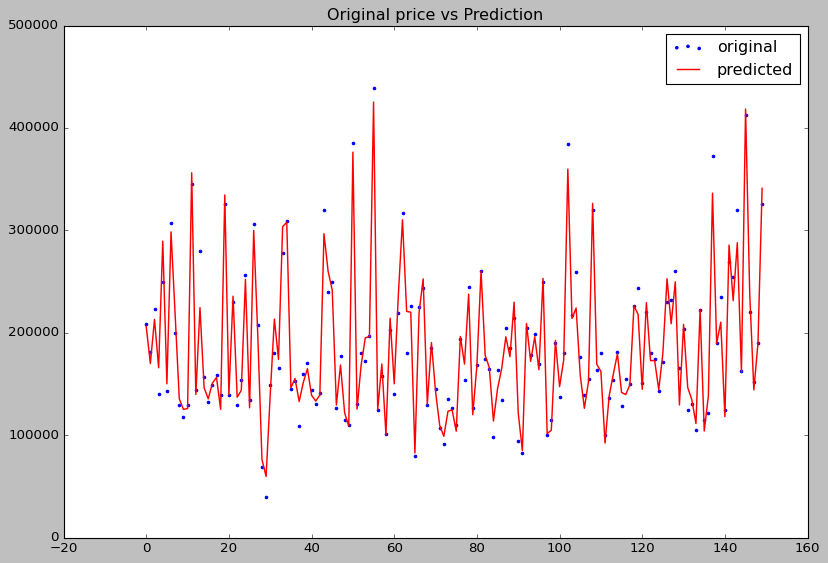

In [60]:
x_ax = range(len(df['SalePrice'].head(150)))
plt.figure(figsize=(12,8))
plt.title('Original price vs Prediction')
plt.scatter(x_ax, df['SalePrice'].head(150), s=5, color="blue", label="original")
plt.plot(x_ax, df['PricePrediction'].head(150), lw=1.3, color="red", label="predicted")
plt.legend()
plt.show()

# Test Dataset precessing:

In [38]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [39]:
for x in ['Alley','MiscFeature','Fence','PoolQC','FireplaceQu']:
       test=test.drop(x,axis=1)

In [40]:
mean2=test['LotFrontage'].mean()
test['LotFrontage']=test['LotFrontage'].fillna(mean2)


In [41]:
for z in (test.columns[test.dtypes=='object']):
    test[z]= test[z].fillna(test[z].mode()[0])

In [42]:
for y in (test.columns[test.dtypes=='float64']):
    test[y]= test[y].fillna(test[y].mean())

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [44]:
for x in (test.columns[test.dtypes=='object']):
    test[x]= label_encoder.fit_transform(test[x])

In [45]:
X2= test.drop('Id',axis=1)

In [46]:
test['SalePrice'] = gbr.predict(X2)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,120,0,0,6,2010,8,4,126323.684521
1,1462,20,3,81.0,14267,1,0,3,0,0,...,0,0,0,0,12500,6,2010,8,4,163968.734821
2,1463,60,3,74.0,13830,1,0,3,0,4,...,0,0,0,0,0,3,2010,8,4,180555.287525
3,1464,60,3,78.0,9978,1,0,3,0,4,...,0,0,0,0,0,6,2010,8,4,182904.072508
4,1465,120,3,43.0,5005,1,0,1,0,4,...,0,0,144,0,0,1,2010,8,4,197418.493115


# Final dataset:

In [47]:
final=test[['Id','SalePrice']]
final.head()

,Id,SalePrice
0,1461,126323.684521
1,1462,163968.734821
2,1463,180555.287525
3,1464,182904.072508
4,1465,197418.493115


In [49]:
final.to_csv('final_pred.csv')

# **Prediction score result: Top 6%**

**If you like this notebook! Don't forget to upvote it! More notebooks are coming soon! Thank you!**